# Project Name: Storm is Coming.. Are You Safe!?
**Member 1: &emsp; Name:** Huzefa Saifee &emsp; **UID:** u1274086 &emsp; **Email:** u1274086@utah.edu
<br>**Member 2: &emsp; Name:** Siddharth Hatkar &emsp; **UID:** u1273107 &emsp; **Email:** u1273107@utah.edu
<br>**Member 3: &emsp; Name:** Soumith Reddy Mada &emsp; **UID:** u1288778 &emsp; **Email:** u1288778@utah.edu

# Background and Motivation:
Predicting the intensity of a storm by different weather forecasts is a boon which helps us predict what kind of storm is going to hit and by what intensity, so that we can take preventive measures for such storms beforehand.
<br><br>However, predicting the intensities of storms on the basis of damage and the casualties caused by them can help in taking better preventive measures for different types of storms.
<br><br>In 2019 alone, the Atlantic storms caused damage of approximately $22 billion in America, according to a report by AccuWeather.
<br><br>On an average:
<ul><li>80 deaths and 1,500 injuries each year are directly attributed to thousands of tornadoes reported. (source: www.nssl.noaa.gov)</li>
<li>31 deaths per year are caused by thunderstorm winds; Number of thunderstorms occurring in the United States a year: 100,000.</li></ul>


# Project objective:
Our goal is to Analyze different types of storms in different parts of America based on historical data gathered from the National Centers for Environmental Information datasets of the past 20 years. Also, analyzing the deaths caused by different storms in a geospatial way.
<br><br>The most important questions that arise when we hear about Storms are:
<ul><li>What was the number of casualties due to that storm?</li>
    <li>What was the damage caused because of the storm?</li></ul>
With this project, we are trying to convert these <i>“was”</i> questions into the prediction of the damage that <i>“will be”</i> caused by the storm, i.e. We are trying to predict the damage caused by the Storm in any location based on the multiple factors like Magnitude of the Storms.


In [17]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

# Data:
We have gathered the data from the following website:
<br>https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/?C=M;O=D
<br><br>It has a dataset of storms that occurred in the USA every year (for 2019, 2018, 2017...).
<br><br>Our goal is to merge all of the different datasets of the different year into one single dataset and perform descriptive analysis, and predictive analysis of the storm data generated.
<br><br>The Metadata of the columns is described in the following link:
<br>http://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Export-Format.docx 


In [18]:
# Data Retrieval
storm = pd.read_csv("StormEvents_2019details.csv")
storm.head()
storm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64439 entries, 0 to 64438
Data columns (total 51 columns):
BEGIN_YEARMONTH       64439 non-null int64
BEGIN_DAY             64439 non-null int64
BEGIN_TIME            64439 non-null int64
END_YEARMONTH         64439 non-null int64
END_DAY               64439 non-null int64
END_TIME              64439 non-null int64
EPISODE_ID            64439 non-null int64
EVENT_ID              64439 non-null int64
STATE                 64439 non-null object
STATE_FIPS            64439 non-null int64
YEAR                  64439 non-null int64
MONTH_NAME            64439 non-null object
EVENT_TYPE            64439 non-null object
CZ_TYPE               64439 non-null object
CZ_FIPS               64439 non-null int64
CZ_NAME               64439 non-null object
WFO                   64439 non-null object
BEGIN_DATE_TIME       64439 non-null object
CZ_TIMEZONE           64439 non-null object
END_DATE_TIME         64439 non-null object
INJURIES_DIRECT       

# Ethical Consideration:
Data collected or recorded are accurate. We are performing this analysis only for America, as the number of storm cases in America contributes to 40% of the entire world. <br><br>
The data is openly available at https://www.ncdc.noaa.gov/stormevents/ftp.jsp by the government of America for public interest and we have verified that anyone is allowed to access and perform ethical data analysis.<br><br>
Since we are working on a dataset of different types of Storms, which are Natural Disasters and is not in control of humankind, the risk of violating ethical consideration reduces to a great extent. The only bias our models might have is of showing more storms in the areas which are prone to that kind of storms and that is a valid bias as well. <br><br>
We also made sure that our data doesn’t have any sort of bias that might impair any individual or community. Therefore, we strongly believe that our data is ethical and our analysis will help mankind.<br><br>

# Data Processing:
For this proposal, we have considered only the 2019 dataset and as stated above, for the submission of our final project, we will try to get data for at least 20 years. <br><br>
We have created new fields like Tot_Deaths & Tot_Injuries by adding columns of direct and indirect deaths and injuries to get a better initial understanding of the effects of the storms. <br><br>

In [19]:
# Addition of Deaths & Injuries into one new Column
storm['Tot_Deaths'] = storm['DEATHS_DIRECT'] + storm['DEATHS_INDIRECT']
storm['Tot_Injures'] = storm['INJURIES_DIRECT'] + storm['INJURIES_INDIRECT']

# Exploratory Data Analysis:
 After performing a final EDA, we might find a few columns that have outliers and needs to be removed before further analysis. <br><br>
 We have also converted the “Damage Property” column from string datatype to int (1k to 1000). <br><br>
We found a few columns with null values and further research is required whether we should remove those values or whether we are supposed to perform null value imputation on them. <br>Also, we can remove a few columns because they might not be significant in performing analysis or they might are highly correlated with other columns in the dataset.

In [20]:
storm.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,...,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,Tot_Deaths,Tot_Injures
count,64439.000000,64439.000000,64439.000000,64439.000000,64439.000000,64439.000000,64439.000000,64439.000000,64439.000000,64439.0,...,1649.000000,194.000000,42858.000000,42858.000000,42858.000000,42858.000000,42858.000000,42858.000000,64439.000000,64439.000000
mean,201905.663216,16.235091,1311.564006,201905.663216,17.198793,1437.985971,138130.895653,830271.531510,33.384612,2019.0,...,215.840255,112.639175,2.490060,2.511946,38.099742,-90.270735,38.097079,-90.261856,0.008101,0.025264
std,2.786798,8.848480,648.056984,2.786798,8.795240,607.211592,3206.683684,20122.983803,18.889862,0.0,...,377.464905,85.005173,4.555164,4.575659,4.904186,11.634131,4.903390,11.630922,0.143978,0.973252
min,201901.000000,1.000000,0.000000,201901.000000,1.000000,0.000000,132253.000000,791304.000000,1.000000,2019.0,...,1.000000,1.000000,0.000000,0.000000,-14.331600,-171.032700,-14.382500,-170.878700,0.000000,0.000000
25%,201904.000000,9.000000,900.000000,201904.000000,10.000000,1100.000000,135428.000000,813125.500000,20.000000,2019.0,...,50.000000,49.000000,1.000000,1.000000,35.180150,-97.417650,35.180000,-97.402100,0.000000,0.000000
50%,201906.000000,17.000000,1500.000000,201906.000000,18.000000,1553.000000,137872.000000,830541.000000,31.000000,2019.0,...,100.000000,102.000000,1.000000,1.000000,38.670000,-89.910400,38.666450,-89.888250,0.000000,0.000000
75%,201908.000000,23.000000,1800.000000,201908.000000,24.000000,1855.000000,140803.000000,847450.500000,46.000000,2019.0,...,225.000000,145.000000,3.000000,3.000000,41.330000,-80.940000,41.320675,-80.930000,0.000000,0.000000
max,201911.000000,31.000000,2359.000000,201911.000000,31.000000,2359.000000,144628.000000,869176.000000,99.000000,2019.0,...,5280.000000,401.000000,152.000000,152.000000,66.838500,-64.715100,66.832900,-64.715100,23.000000,166.000000


In [21]:
# Outlier Suspection Method
storm.TOR_LENGTH.describe()

count    1649.000000
mean        2.904330
std         3.804624
min         0.010000
25%         0.450000
50%         1.440000
75%         3.980000
max        31.400000
Name: TOR_LENGTH, dtype: float64

In [22]:
# Coverting Column Datatype (String to Integer)
for i in range(0, len(storm.DAMAGE_PROPERTY)): 
    if(type(storm.DAMAGE_PROPERTY[i]) == str):
        if ('K' in storm.DAMAGE_PROPERTY[i]):
            storm.DAMAGE_PROPERTY[i] = storm.DAMAGE_PROPERTY[i].replace("K","")
            storm.DAMAGE_PROPERTY[i] =int(float(storm.DAMAGE_PROPERTY[i])*1000)
        elif('M' in storm.DAMAGE_PROPERTY[i]):
            storm.DAMAGE_PROPERTY[i] = storm.DAMAGE_PROPERTY[i].replace("M","")
            storm.DAMAGE_PROPERTY[i] =int(float(storm.DAMAGE_PROPERTY[i])*1000000)
        elif('B' in storm.DAMAGE_PROPERTY[i]):
            storm.DAMAGE_PROPERTY[i] = storm.DAMAGE_PROPERTY[i].replace("B","")
            storm.DAMAGE_PROPERTY[i] =int(float(storm.DAMAGE_PROPERTY[i])*1000000000)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [23]:
# Removing NAs
storm = storm[storm['DAMAGE_PROPERTY'].notna()]
storm.DAMAGE_PROPERTY = storm.DAMAGE_PROPERTY.astype(int)

# Data Visualization

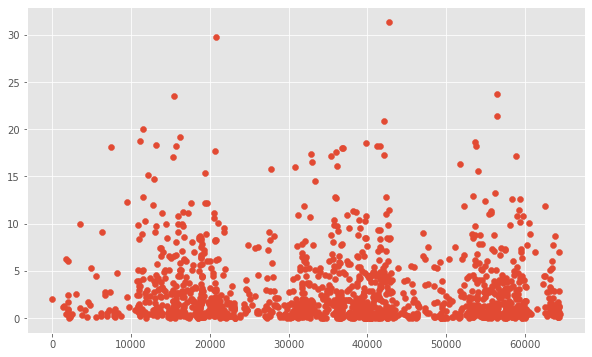

In [24]:
# Outlier Detection Method
x = storm.TOR_LENGTH.index.values
plt.scatter(x, storm.TOR_LENGTH)

In [25]:
# Group by states
pd.set_option('display.max_rows',65)
storm_dea = storm.groupby('STATE').agg({'Tot_Deaths':'sum'})
#storm.plot(x='STATE', y='Tot_Deaths', kind="bar")

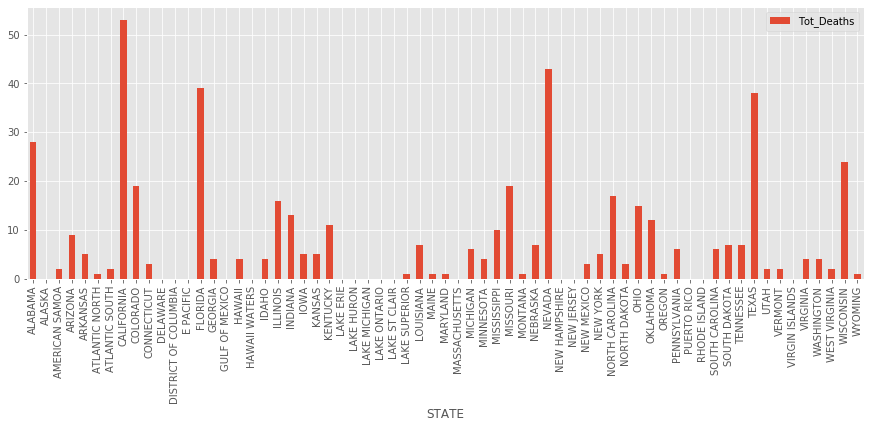

In [26]:
storm_dea.plot(kind="bar",figsize=(15,5))

In [27]:
#Group by states
storm_type_dea = storm.groupby('EVENT_TYPE').agg({'Tot_Deaths':'sum'})
storm_type_dea

,Tot_Deaths
EVENT_TYPE,
Astronomical Low Tide,0
Avalanche,12
Blizzard,5
Coastal Flood,0
Cold/Wind Chill,32
Debris Flow,2
Dense Fog,4
Dense Smoke,0
Drought,0


Text(0, 0.5, 'Total Number of Deaths')

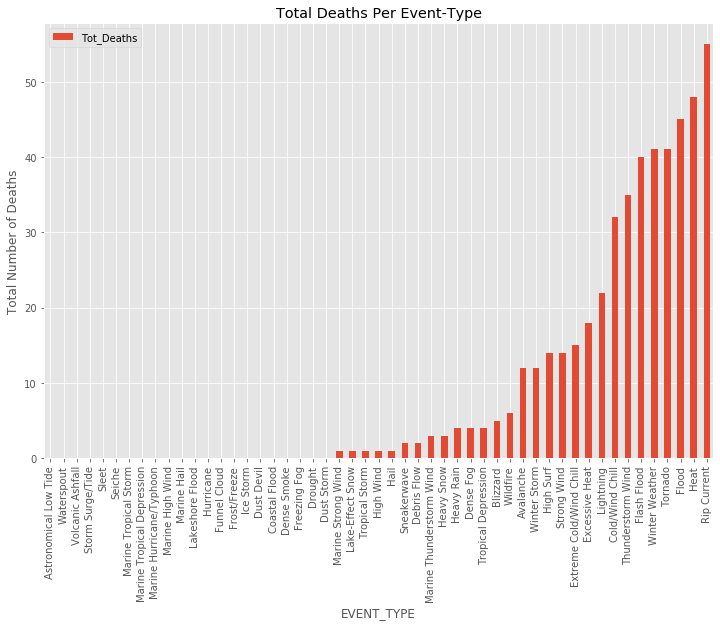

In [28]:
storm_type_dea.sort_values(by='Tot_Deaths',ascending=True).plot(kind="bar",figsize=(12,8))
plt.title("Total Deaths Per Event-Type")
plt.ylabel("Total Number of Deaths")

In [29]:
storm_type_inj = storm.groupby('EVENT_TYPE').agg({'Tot_Injures':'sum'})


Text(0, 0.5, 'Total Number of Injuries')

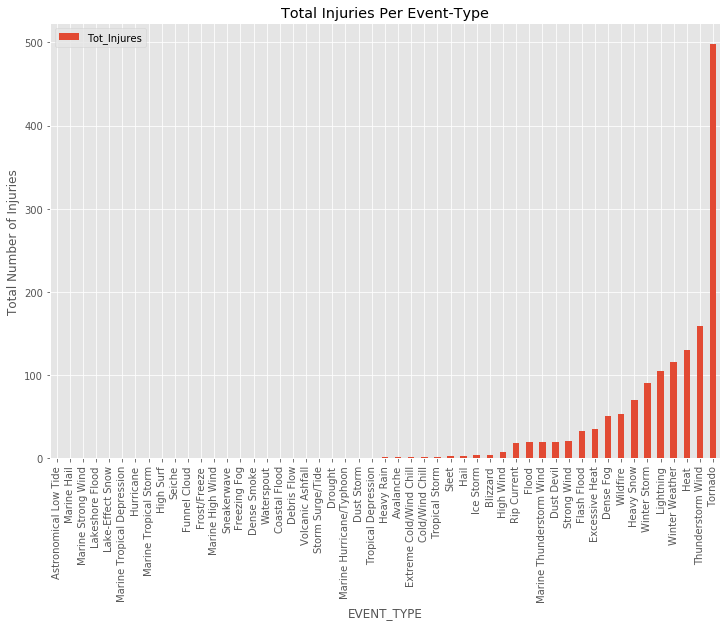

In [30]:
storm_type_inj.sort_values(by='Tot_Injures',ascending=True).plot(kind="bar",figsize=(12,8))
plt.title("Total Injuries Per Event-Type")
plt.ylabel("Total Number of Injuries")

In [31]:
storm_type_dam_prop = storm.groupby('EVENT_TYPE').agg({'DAMAGE_PROPERTY':'sum'})

Text(0, 0.5, 'Total Damage in 100M')

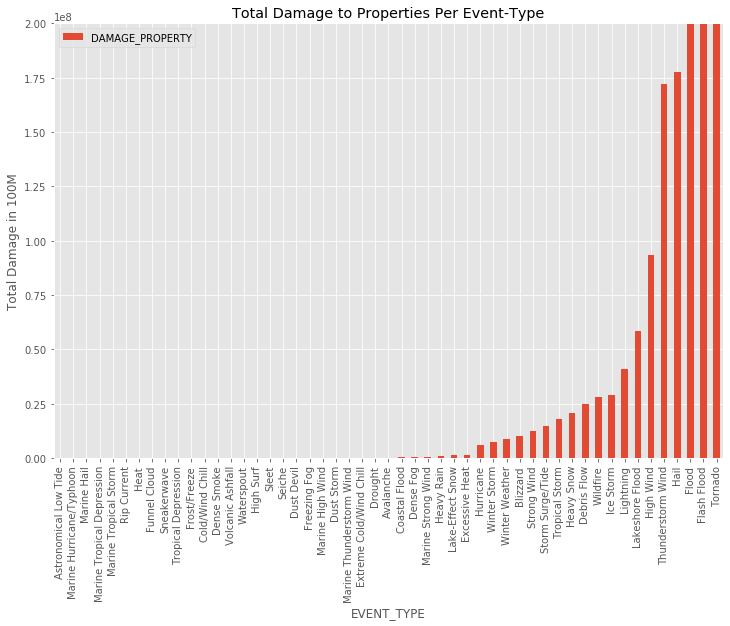

In [32]:
fig_dp = storm_type_dam_prop.sort_values(by='DAMAGE_PROPERTY',ascending=True).plot(kind="bar",figsize=(12,8))
fig_dp.set_ylim(0, 200000000)
plt.title("Total Damage to Properties Per Event-Type")
plt.ylabel("Total Damage in 100M")

#NOTE: Floods, Flash Floods, and Tornados have damage of more than $200M.

# Analysis Methodology:
Our major considerations are some important attributes from the dataset, like the number of deaths or injuries, and locations that were affected by the storms also the total damage caused.<br><br>
We are interested in finding the relationships, if any, on the above-stated questions and understanding what kind of magnitudes of the storm are influencing how many deaths, injuries in America.<br><br>
Based on this we are planning to model our data and predict the number of deaths in the future years due to a particular storm of some specific magnitude to take preventive measures in a much better way.<br><br> 

# Project Schedule:
**Proposal Date**: February 28 <br>
**Meeting with the staff**: TBD <br>
**Milestone**: March 29 <br>
**Meeting with the staff**: TBD <br>
**Final Submission**: April 19 <br>
**Project Presentation**: April 21 <br>
 
 


# References:
http://www-das.uwyo.edu/~geerts/cwx/notes/chap03/nat_hazard.html <br>
https://www.depts.ttu.edu/nwi/research/DebrisImpact/Reports/DDS.pdf  <br>
https://www.nbcnews.com/news/weather/atlantic-hurricane-seasons-2019-2010-graphics-data-n1091986 <br>
https://www.c2es.org/content/hurricanes-and-climate-change/ <br>